In [1]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# set the path to the directory containing the video files
os.chdir("C:/Users/Vissarapu Srinath/Cars/Cars/")


In [3]:
video = cv2.VideoCapture("C:/Users/Vissarapu Srinath/Cars/Cars/car001.m2ts")
i=1
while True:
    ret, img = video.read()
    cv2.imshow('live video',img)
    key=cv2.waitKey(25)
    if key == ord('e'):
        Video.release()
        cv2.destroyAllWindows()
        break

NameError: name 'Video' is not defined

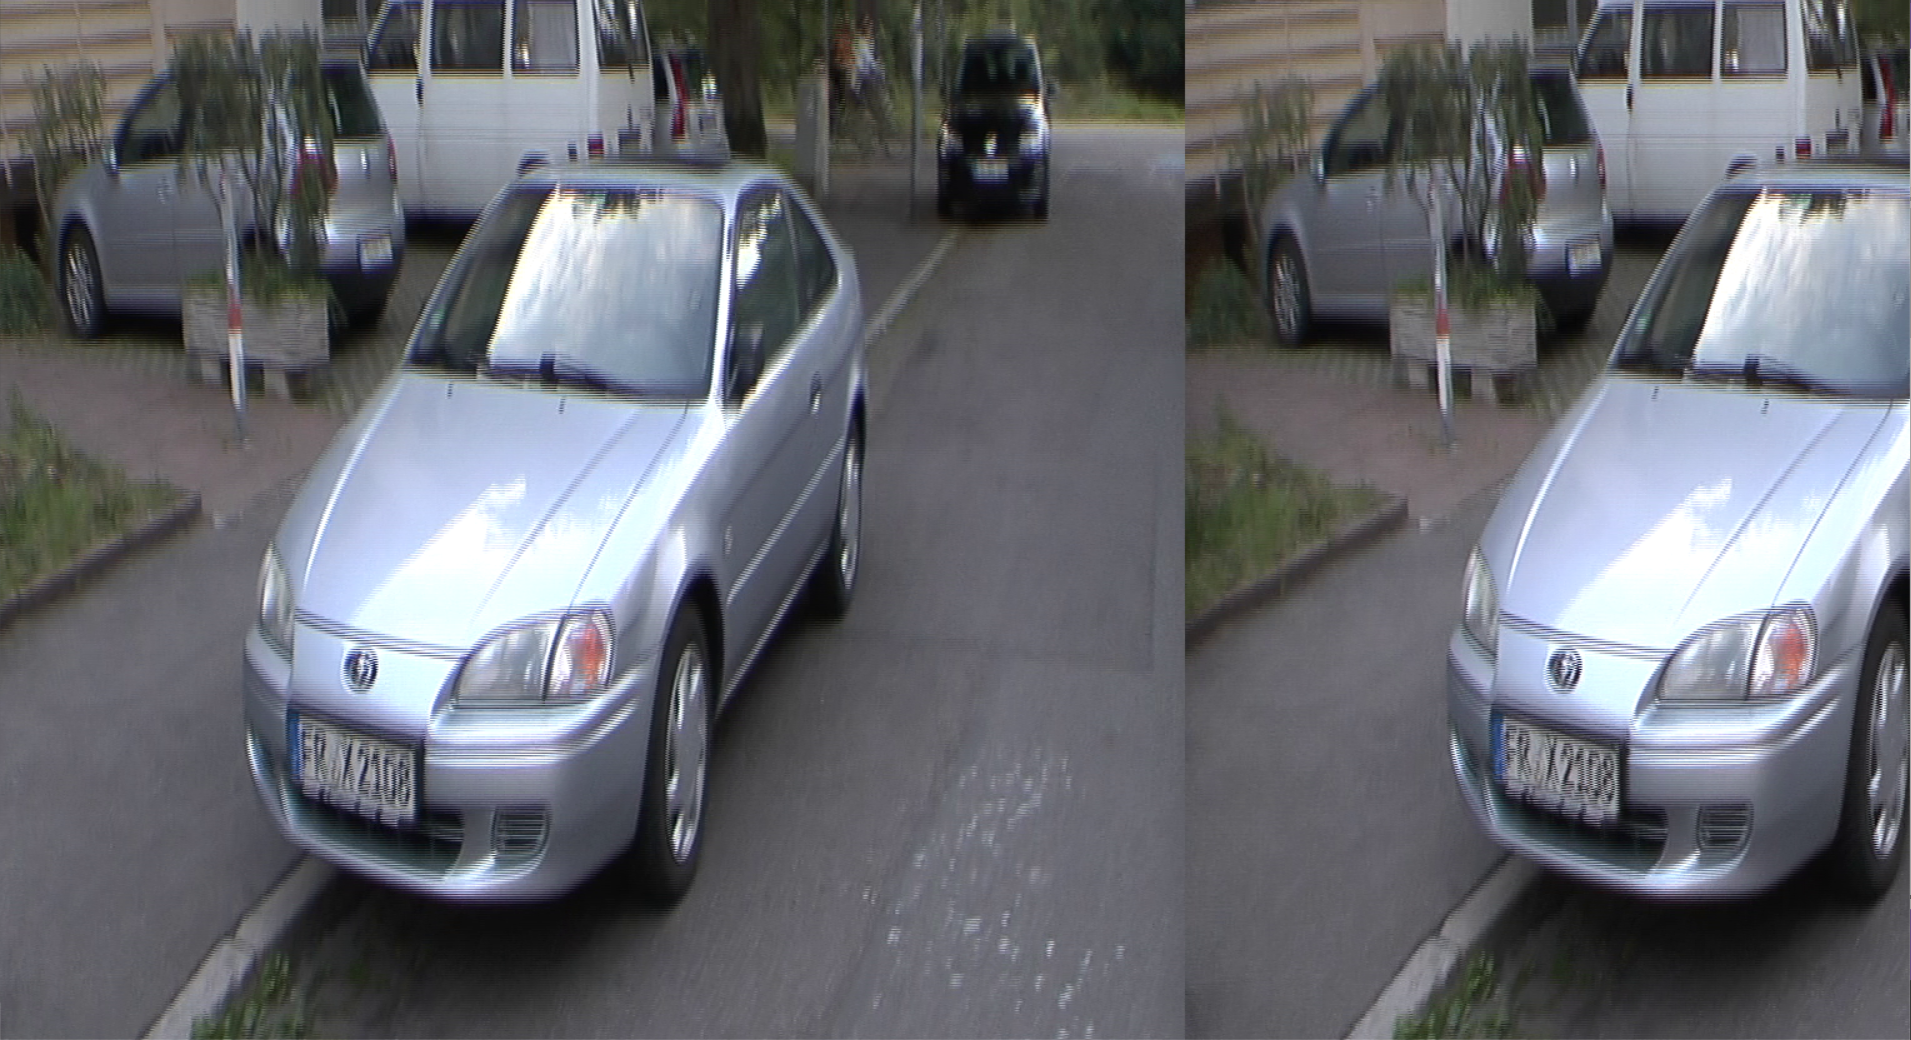

In [5]:
# extract the left and right stereo images from the video
left_images = []
right_images = []
cap = cv2.VideoCapture("C:/Users/Vissarapu Srinath/Cars/Cars/car001.m2ts")
while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

In [10]:
cap = cv2.VideoCapture("C:/Users/Vissarapu Srinath/Cars/Cars/car001.m2ts")

In [11]:
left_images = []
right_images = []

while True:
    ret, frame = cap.read()

    if not ret:
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    left_image = frame[:, :frame.shape[1]//2]
    right_image = frame[:, frame.shape[1]//2:]
    left_images.append(left_image)
    right_images.append(right_image)

In [12]:
cap.release()

In [13]:
# preprocess the stereo images
def preprocess_stereo_images(left_image, right_image, image_size=(256, 256)):
        left_image = cv2.resize(left_image, image_size)
        right_image = cv2.resize(right_image, image_size)
        left_image = left_image.astype(np.float32) / 255.
        right_image = right_image.astype(np.float32) / 255.
        return left_image, right_image


In [14]:
# apply the preprocessing to stereo images
preprocessed_left_images = []
preprocessed_right_images = []
for i in range(len(left_images)):
        left_image, right_image = preprocess_stereo_images(left_images[i], right_images[i])
        preprocessed_left_images.append(left_image)
        preprocessed_right_images.append(right_image)


In [15]:
# split the stereo images into training and validation sets
num_samples = len(preprocessed_left_images)
train_indices = np.random.choice(num_samples, int(num_samples * 0.8), replace=False)
val_indices = np.setdiff1d(np.arange(num_samples), train_indices)
train_left_images = [preprocessed_left_images[i] for i in train_indices]
train_right_images = [preprocessed_right_images[i] for i in train_indices]
val_left_images = [preprocessed_left_images[i] for i in val_indices]
val_right_images = [preprocessed_right_images[i] for i in val_indices]

In [16]:
# for example, you can concatenate the left and right images horizontally to obtain a stereo pair
stereo_pairs = []
for i in range(len(train_left_images)):
        stereo_pair = np.concatenate((train_left_images[i], train_right_images[i]), axis=1)
        stereo_pairs.append(stereo_pair)


In [ ]:
# you can also visualize the stereo pairs to ensure they look correct
for i in range(len(stereo_pairs)):
    cv2.imshow('stereo pair', stereo_pairs[i])
    cv2.waitKey(0)

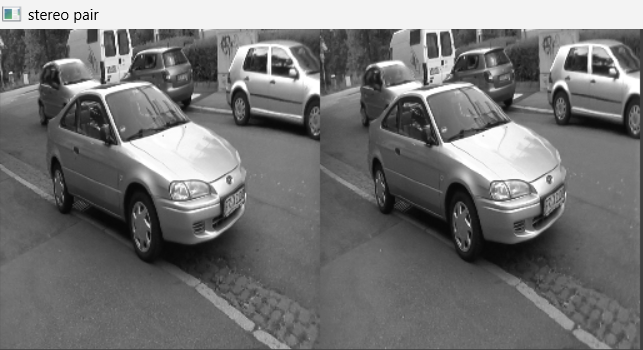

In [7]:
left_camera = cv2.VideoCapture(0)
right_camera = cv2.VideoCapture(0)

In [8]:
# Set the video resolution
left_camera.set(cv2.CAP_PROP_FRAME_WIDTH, )
left_camera.set(cv2.CAP_PROP_FRAME_HEIGHT, )
right_camera.set(cv2.CAP_PROP_FRAME_WIDTH, )
right_camera.set(cv2.CAP_PROP_FRAME_HEIGHT,)

True

In [9]:
print(left_camera.get(cv2.CAP_PROP_FRAME_WIDTH))   
print(left_camera.get(cv2.CAP_PROP_FRAME_HEIGHT))  
print(right_camera.get(cv2.CAP_PROP_FRAME_WIDTH))  
print(right_camera.get(cv2.CAP_PROP_FRAME_HEIGHT)) 

640.0
480.0
640.0
480.0


In [89]:
output_path = " "
fourcc = cv2.VideoWriter_fourcc(*" ")
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height), isColor=False)

In [91]:
while cap.isOpened():
    # Read the next frame from the video
    ret, frame = video.read()

    if not ret:
        break

In [14]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((384, 384)),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])


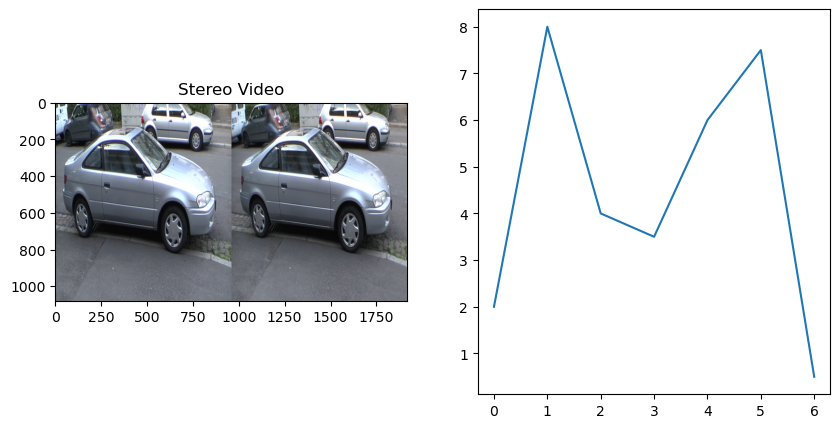

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Open stereo video capture
cap = cv2.VideoCapture("C:/Users/Vissarapu Srinath/Cars/Cars/car001.m2ts")

# Define figure and axes for stereo video and motion plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title('Stereo Video')
axs[1].set_title('Motion')

# Define empty array for storing motion estimates
motions = [2,8,4,3.5,6,7.5]

while cap.isOpened():
    # Read stereo frames from video
    ret, frame = cap.read()
    if not ret:
        break
    
    # Split stereo frames into left and right images
    left_image = frame[:, :frame.shape[1]//2]
    right_image = frame[:, frame.shape[1]//2:]
    
    # Perform stereo ego motion estimation
    # ...
    # Store motion estimate in motions array
    motion_estimate = 0.5  # Replace with actual motion estimate
    motions.append(motion_estimate)
    
    # Plot stereo video and motion estimate
    axs[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    axs[1].clear()  # Clear plot before updating with new data
    axs[1].plot(motions)
    
    # Pause plot to simulate real-time display
    plt.pause(0.05)
    
# Release video capture and close plot
cap.release()
plt.close()
